In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np

In [2]:
demand_ids = ['3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408', '62ca043d-6e70-42e3-a20a-ded2252e3d0d', '52c4a3f2-2cd0-4907-ad4d-8612e99f7099', '6610f096-a5ab-4b52-8310-3d4b6bce0143', '8150ec6d-eda3-41a8-81c4-684427f2ace2']

In [3]:
random_ids = ['624afe9b-558c-4481-8095-aa602e7b5314', '56a70108-025e-483f-93fa-938cb4bb7437', 'fff02414-df00-4719-b02c-ba3de3fd8158', '9c269232-005f-4941-8b5f-761ff77dcc75', 'a44078d6-d6a9-4f64-8e6d-30b703db1f90']

In [4]:
static_ids =['e34dabed-c12a-46de-9294-9db3d23ef51e', 'd854476c-7e16-4e2f-9419-947342304ab4', 'f66be32b-7cf9-4191-8930-9fe4d2f0b030', 'a18b72ae-d27e-4baf-9896-6d9130342ff2', '968dfd48-7327-4068-bc79-b9d1750dadba']

In [5]:
run_dir = "../experiments/runs"

In [6]:
def get_trajectories(sim_ids):
    trajectories = []
    for sim_id in sim_ids:
        df = pd.read_csv(os.path.join(run_dir, sim_id, "output.csv"))
        df['sim-id'] = sim_id
        trajectories.append(df)
    trajectories = pd.concat(trajectories, axis=0)
    trajectories['datetime'] = pd.to_datetime(trajectories['datetime'])
    trajectories['date'] = trajectories['datetime'].dt.date
    
    total_reward = trajectories[['date', 'display', 'revenue', 'sim-id']].groupby(["sim-id","display", "date"]).agg(
    {"revenue": sum}
    )
    total_reward = total_reward.reset_index().sort_values(by=['sim-id', 'display','date'])
    mu = total_reward.groupby(['display', 'date']).agg({'revenue': np.mean}).reset_index()
    #sig = total_reward.groupby(['display', 'date']).agg({'revenue': np.std}).reset_index()
    
    #mu['upper'] = mu['revenue'] + sig['revenue']*1.96
    #mu['lower'] = mu['revenue'] - sig['revenue']*1.96
    mu['cumulative'] = mu.groupby(["display"]).cumsum()
    return mu


In [7]:
sim_ids = demand_ids

In [8]:
trajectories = []
for sim_id in sim_ids:
    df = pd.read_csv(os.path.join(run_dir, sim_id, "output.csv"))
    df['sim-id'] = sim_id
    trajectories.append(df)

In [9]:
trajectories = []
for sim_id in sim_ids:
    df = pd.read_csv(os.path.join(run_dir, sim_id, "output.csv"))
    df['sim-id'] = sim_id
    trajectories.append(df)
trajectories = pd.concat(trajectories, axis=0)
trajectories['datetime'] = pd.to_datetime(trajectories['datetime'])
trajectories['date'] = trajectories['datetime'].dt.date


In [10]:
trajectories

,datetime,product,display,num_slots,quantity_sold,price,revenue,sim-id,date
0,2021-05-01 12:00:00,coca_cola_20oz_bottle,dairy-cooler,5,2.0,1.99,3.98,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,2021-05-01
1,2021-05-01 12:00:00,dr_pepper_20oz_bottle,dairy-cooler,2,2.0,0.99,1.98,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,2021-05-01
2,2021-05-01 12:00:00,sprite_20oz_bottle,dairy-cooler,3,4.0,1.99,7.96,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,2021-05-01
3,2021-05-01 12:00:00,coca_cola_20oz_bottle,entrance-cooler,3,2.0,1.99,3.98,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,2021-05-01
4,2021-05-01 12:00:00,dr_pepper_20oz_bottle,entrance-cooler,2,1.0,0.99,0.99,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,2021-05-01
...,...,...,...,...,...,...,...,...,...
324,2021-05-31 12:00:00,Monster_16oz_can,dairy-cooler,7,0.0,2.99,0.00,8150ec6d-eda3-41a8-81c4-684427f2ace2,2021-05-31
325,2021-05-31 12:00:00,coca_cola_20oz_bottle,deli-cooler,1,0.0,1.99,0.00,8150ec6d-eda3-41a8-81c4-684427f2ace2,2021-05-31
326,2021-05-31 12:00:00,diet_coke_20oz_bottle,deli-cooler,1,1.0,1.99,1.99,8150ec6d-eda3-41a8-81c4-684427f2ace2,2021-05-31
327,2021-05-31 12:00:00,sprite_20oz_bottle,deli-cooler,1,1.0,1.99,1.99,8150ec6d-eda3-41a8-81c4-684427f2ace2,2021-05-31


In [11]:
total_reward = trajectories[['date', 'display', 'revenue', 'sim-id']].groupby(["sim-id","display", "date"]).agg(
{"revenue": sum}
)
total_reward = total_reward.reset_index().sort_values(by=['sim-id', 'display','date'])

In [12]:
total_reward

,sim-id,display,date,revenue
0,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,dairy-cooler,2021-05-01,13.92
1,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,dairy-cooler,2021-05-02,9.95
2,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,dairy-cooler,2021-05-03,25.91
3,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,dairy-cooler,2021-05-04,31.87
4,3ef4048f-0aaa-4ad8-aeb6-e0a183ecc408,dairy-cooler,2021-05-05,41.85
...,...,...,...,...
455,8150ec6d-eda3-41a8-81c4-684427f2ace2,entrance-cooler,2021-05-27,5.97
456,8150ec6d-eda3-41a8-81c4-684427f2ace2,entrance-cooler,2021-05-28,5.97
457,8150ec6d-eda3-41a8-81c4-684427f2ace2,entrance-cooler,2021-05-29,11.94
458,8150ec6d-eda3-41a8-81c4-684427f2ace2,entrance-cooler,2021-05-30,13.93


In [13]:
random_policy = get_trajectories(random_ids)
match_policy = get_trajectories(demand_ids)

In [14]:
static_policy = get_trajectories(static_ids)

In [15]:
display_list = list(random_policy['display'].unique())

/opt/anaconda3/envs/allocation-rl/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


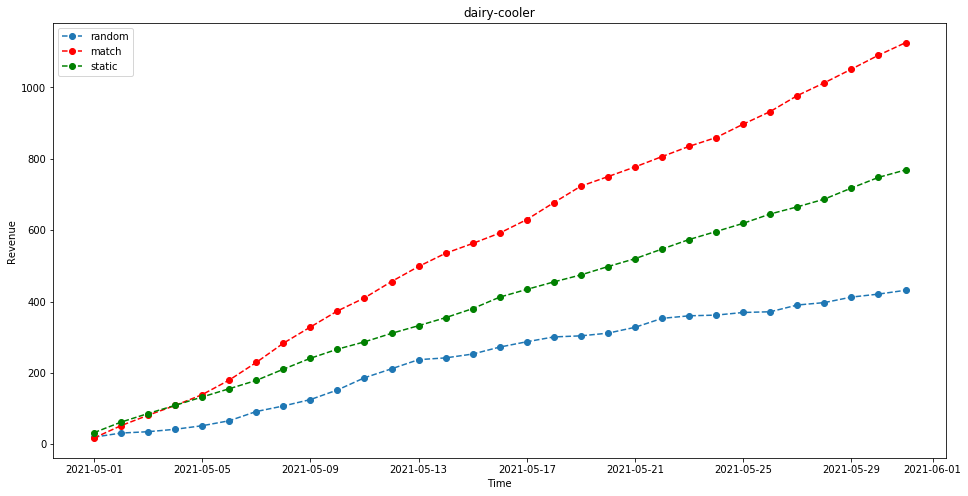

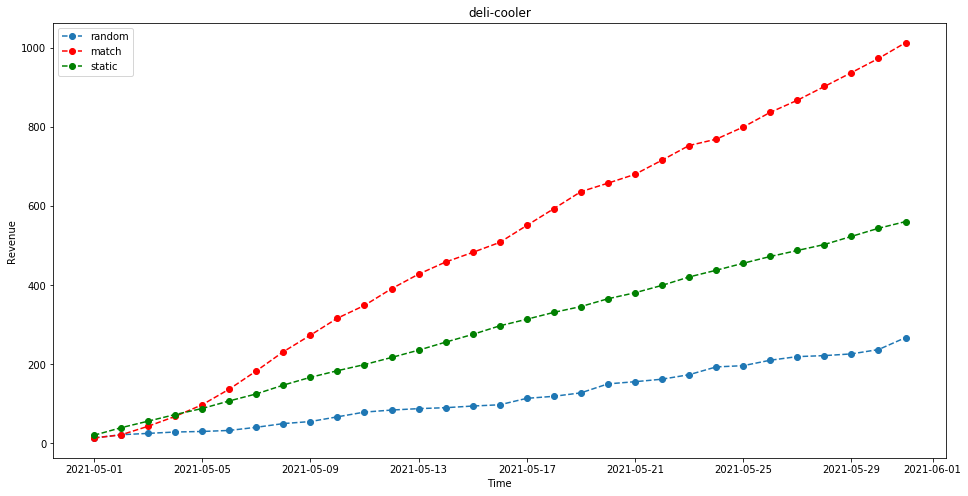

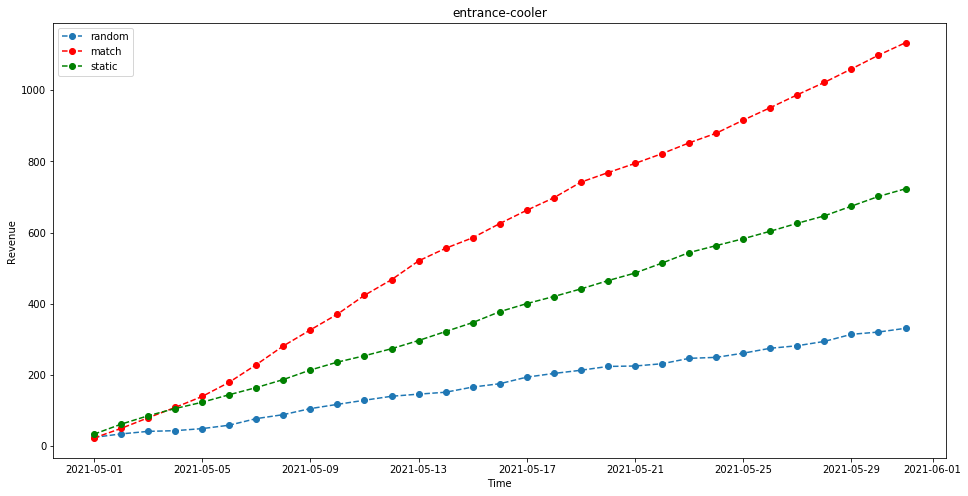

In [16]:
for d in display_list:
    
    rand_disp = random_policy[random_policy['display'] == d]
    match_disp = match_policy[match_policy['display'] == d]
    static_disp = static_policy[static_policy['display'] ==d]
    
    fig = plt.figure(figsize=(16, 8))
    
    # random
    plt.plot(rand_disp["date"], rand_disp["cumulative"], "--", marker='o',  label='random')
    #plt.fill_between(rand_disp["date"],rand_disp["lower"], rand_disp["upper"], alpha=.1)
    # match
    plt.plot(match_disp["date"], match_disp["cumulative"], "--", marker='o', color='red',  label='match')
    #plt.fill_between(match_disp["date"],match_disp["lower"], match_disp["upper"], alpha=.1, color='red')
    # static
    plt.plot(static_disp["date"], static_disp["cumulative"], "--", marker='o', color='green',  label='static')
    #plt.fill_between(static_disp["date"],static_disp["lower"], static_disp["upper"], alpha=.1, color='green')
    
    
    
    plt.title(d)
    plt.xlabel("Time")
    plt.ylabel("Revenue")
    plt.legend(loc='best')

In [17]:
rand_output = random_policy[['display', 'cumulative']].groupby('display').max()
static_output = static_policy[['display', 'cumulative']].groupby('display').max()
match_output = match_policy[['display', 'cumulative']].groupby('display').max()

In [18]:
match_output['pct_gain_rand'] = 100*(match_output['cumulative'] - rand_output['cumulative'])/ rand_output['cumulative']

In [19]:
match_output['pct_gain_static'] = 100*(match_output['cumulative'] - static_output['cumulative'])/ static_output['cumulative']

In [20]:
match_output

,cumulative,pct_gain_rand,pct_gain_static
display,,,
dairy-cooler,1125.5400,160.825133,46.387333
deli-cooler,1013.6835,278.832155,80.670991
entrance-cooler,1133.3320,242.404650,56.769692
